# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, plot_confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import pandas as pd
import typing

In [72]:
RANDOM_SEED = 42

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv', encoding='ISO-8859-1')

## 2. Load the dataset [1 point]

In [74]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 3. Explore the dataset [10 points]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [76]:
df.shape

(4845, 2)

In [77]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [78]:
df.rename(columns={'neutral': 'label', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .': 'text'}, inplace=True)
df.columns

Index(['label', 'text'], dtype='object')

In [79]:
print(df[df['label'] == 'neutral'].shape[0])
print(df[df['label'] == 'negative'].shape[0])
print(df[df['label'] == 'positive'].shape[0])

2878
604
1363


## 4. Clean the data [5 points]

In [80]:
df.reset_index(inplace=True)

In [81]:
df.drop(columns=['index'], inplace=True)
df.head()

,label,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [82]:
len(df.columns)

2

In [83]:
df2 = pd.DataFrame([[df.columns[0], df.columns[1]]], columns=df.columns)
df.append(df2)
df.iloc[-1]

label                                             negative
text     Sales in Finland decreased by 10.5 % in Januar...
Name: 4844, dtype: object

In [84]:
classes: typing.List[str] = df['label'].unique().tolist()
classes

['neutral', 'negative', 'positive']

In [85]:
classes.index('neutral')

0

In [86]:
X = []
y = []
for i in range(df.shape[0]):
    X.append(df.at[i, 'text'])
    y.append(classes.index(df.at[i, 'label']))

print(X[:3])
print(y[:3])

['Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .', 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .', 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .']
[0, 1, 2]


In [87]:
X = [word_tokenize(text) for text in X]
X[0]

['Technopolis',
 'plans',
 'to',
 'develop',
 'in',
 'stages',
 'an',
 'area',
 'of',
 'no',
 'less',
 'than',
 '100,000',
 'square',
 'meters',
 'in',
 'order',
 'to',
 'host',
 'companies',
 'working',
 'in',
 'computer',
 'technologies',
 'and',
 'telecommunications',
 ',',
 'the',
 'statement',
 'said',
 '.']

In [88]:
stop_words = set(stopwords.words('english'))
X = [[word for word in text if word not in stop_words] for text in X]
X[0]

['Technopolis',
 'plans',
 'develop',
 'stages',
 'area',
 'less',
 '100,000',
 'square',
 'meters',
 'order',
 'host',
 'companies',
 'working',
 'computer',
 'technologies',
 'telecommunications',
 ',',
 'statement',
 'said',
 '.']

In [89]:
X = [[word.lower() for word in text] for text in X]
X[0]

['technopolis',
 'plans',
 'develop',
 'stages',
 'area',
 'less',
 '100,000',
 'square',
 'meters',
 'order',
 'host',
 'companies',
 'working',
 'computer',
 'technologies',
 'telecommunications',
 ',',
 'statement',
 'said',
 '.']

### TextBlob run forever

In [90]:
# X = [[str(TextBlob(word).correct()) for word in text] for text in X]
# X[0]

In [91]:
pos_tags = [(['NN', 'NNS', 'NNP', 'NNPS'], 'n'), (['JJ', 'JJR', 'JJS'], 'a'), (['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ'], 'v'), (['RB', 'RBR', 'RBS'], 'r')]

In [92]:
pos_tag(['ok'])[0][1]

'NN'

In [93]:
lemmatizer = WordNetLemmatizer()

X_lemmatized = []
for text in X:
    new_text = []
    for word in text:
        tag = pos_tag([word])[0][1]
        lemmatized = None
        for tags in pos_tags:
            if tag in tags[0]:
                lemmatized = lemmatizer.lemmatize(word, pos=tags[1])
        new_text.append(lemmatized if lemmatized else word)
    X_lemmatized.append(new_text)

X_lemmatized[0]

['technopolis',
 'plan',
 'develop',
 'stage',
 'area',
 'less',
 '100,000',
 'square',
 'meter',
 'order',
 'host',
 'company',
 'work',
 'computer',
 'technology',
 'telecommunication',
 ',',
 'statement',
 'say',
 '.']

In [94]:
X_joined = [' '.join(text) for text in X_lemmatized]
X_joined[0]

'technopolis plan develop stage area less 100,000 square meter order host company work computer technology telecommunication , statement say .'

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

### Used after feature extraction

## 6. BoW model [15 points]

In [95]:
count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(X_joined)
X_bow

<4845x8587 sparse matrix of type '<class 'numpy.int64'>'
	with 62642 stored elements in Compressed Sparse Row format>

## 7. Tf-idf model [15 points]

In [96]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X_joined)
X_tfidf

<4845x8587 sparse matrix of type '<class 'numpy.float64'>'
	with 62642 stored elements in Compressed Sparse Row format>

### SMOTE

In [97]:
sm = SMOTE()
X_bow, y_bow = sm.fit_resample(X_bow, y)
X_tfidf, y_tfidf = sm.fit_resample(X_tfidf, y)

## 8. Split train test data [3 points]

In [98]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size=0.2, random_state=RANDOM_SEED)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=RANDOM_SEED)

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [99]:
random_forest_bow = RandomForestClassifier(n_estimators=500, random_state=RANDOM_SEED, n_jobs=-1)
random_forest_bow.fit(X_train_bow, y_train_bow)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [100]:
random_forest_tfidf = RandomForestClassifier(n_estimators=500, random_state=RANDOM_SEED, n_jobs=-1)
random_forest_tfidf.fit(X_train_tfidf, y_train_tfidf)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [101]:
y_pred_rf_bow = random_forest_bow.predict(X_test_bow)
print(f'RF & BOW Accuracy score: {accuracy_score(y_test_bow, y_pred_rf_bow)}')
print(f'RF & BOW F1 score: {f1_score(y_test_bow, y_pred_rf_bow, average="weighted")}')

RF & BOW Accuracy score: 0.7243775332947308
RF & BOW F1 score: 0.7191387723541103


In [102]:
y_pred_rf_tfidf = random_forest_tfidf.predict(X_test_tfidf)
print(f'RF & TF-IDF Accuracy score: {accuracy_score(y_test_tfidf, y_pred_rf_tfidf)}')
print(f'RF & TF-IDF F1 score: {f1_score(y_test_tfidf, y_pred_rf_tfidf, average="weighted")}')

RF & TF-IDF Accuracy score: 0.9189345686160972
RF & TF-IDF F1 score: 0.9188325459585087


## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [103]:
knn_bow = KNeighborsClassifier(n_neighbors=3)
knn_bow.fit(X_train_bow, y_train_bow)

KNeighborsClassifier(n_neighbors=3)

In [104]:
knn_tfidf = KNeighborsClassifier(n_neighbors=3)
knn_tfidf.fit(X_train_tfidf, y_train_tfidf)

KNeighborsClassifier(n_neighbors=3)

In [105]:
y_pred_knn_bow = knn_bow.predict(X_test_bow)
print(f'KNN & BOW Accuracy score: {accuracy_score(y_test_bow, y_pred_knn_bow)}')
print(f'KNN & BOW F1 score: {f1_score(y_test_bow, y_pred_knn_bow, average="weighted")}')

KNN & BOW Accuracy score: 0.5130283729009844
KNN & BOW F1 score: 0.44813210627271977


In [106]:
y_pred_knn_tfidf = knn_tfidf.predict(X_test_tfidf)
print(f'KNN & TF-IDF Accuracy score: {accuracy_score(y_test_tfidf, y_pred_knn_tfidf)}')
print(f'KNN & TF-IDF F1 score: {f1_score(y_test_tfidf, y_pred_knn_tfidf, average="weighted")}')

KNN & TF-IDF Accuracy score: 0.7139548349739433
KNN & TF-IDF F1 score: 0.6600712144273858


## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

### RF & BOW

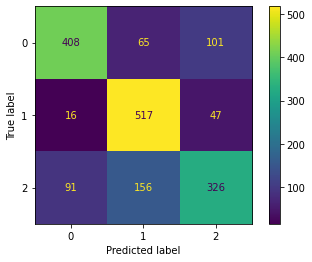

In [107]:
plot_confusion_matrix(random_forest_bow, X_test_bow, y_test_bow)

### RF & TF-IDF

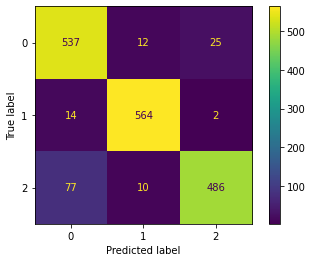

In [108]:
plot_confusion_matrix(random_forest_tfidf, X_test_tfidf, y_test_tfidf)

### KNN & BOW

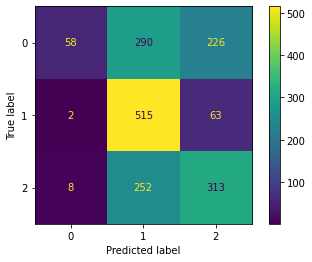

In [109]:
plot_confusion_matrix(knn_bow, X_test_bow, y_test_bow)

### KNN & TF-IDF

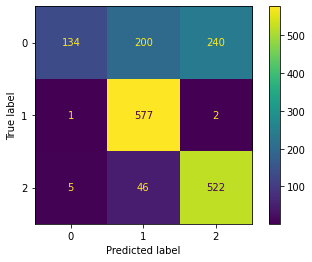

In [110]:
plot_confusion_matrix(knn_tfidf, X_test_tfidf, y_test_tfidf)
